<a href="https://colab.research.google.com/github/ailtiakova/pythonprojects/blob/master/A_B_Test_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
 #Run 10,000 experiments to examine the distribution of the differences between control and experimental groups
# Both control and experimental groups are random normal variables
#500 users in our control group and another 500 in our experimental group each of two normally distributed random variables with the same statistical characteristics as our control group
#(mean = 12%, standard deviation = 5%). 

sims = 10000
mc_1 = []
mc_2 = []
mean_diff = []


In [0]:
for sim in range(sims):
    # Control
    N = 500
    mean_1 = 0.12 # average savings rate
    stdev_1 = 0.05 # how much the members of a group differ from the mean value for the group
    group_1 = []
    [group_1.append(np.random.randn()*stdev_1 + mean_1) for i in range(N)];

    # Experimental
    N = 500
    mean_2 = 0.12 # average savings rate
    stdev_2 = 0.05 # how much the members of a group differ from the mean value for the group
    group_2 = []
    #creates an array of specified shape and fills it with random values as per standard normal distribution
    [group_2.append(np.random.randn()*stdev_2 + mean_2) for i in range(N)];


    mc_1.append(np.mean(group_1))
    mc_2.append(np.mean(group_2))
    mean_diff.append(np.mean(group_2) - np.mean(group_1))

In [8]:
print(mc_1)

[0.11984731008539107, 0.11830826172972456, 0.12379230448123182, 0.11781764980216365, 0.12153554869029005, 0.11848199376716714, 0.12166818954348395, 0.11793418336937755, 0.11861985372936751, 0.12072359015615766, 0.12133869881046877, 0.11897684136652477, 0.12106041049354448, 0.1206004215090087, 0.11962858647069669, 0.11667448260721885, 0.12135938654788114, 0.11760181776796216, 0.12117479034006175, 0.116958278603373, 0.11876477907999299, 0.12226755341483989, 0.11817600757653159, 0.12037392757362127, 0.12020045470058796, 0.11888138509423908, 0.11878517723551506, 0.12180654429255455, 0.11886766276371875, 0.12170640099262005, 0.12119120913152695, 0.12102264444628691, 0.12479088309895181, 0.12132902053109587, 0.12143677282449647, 0.11987849373983914, 0.12163321180540218, 0.1207186824421606, 0.11944511123354885, 0.1179781023323708, 0.12314136708597058, 0.1198691249350156, 0.11889222221575371, 0.11865723411153163, 0.12157510090774915, 0.12159870212140356, 0.11702170917392725, 0.1251184742851481

In [9]:
print(mc_2)

[0.1229170599617639, 0.11897649516916814, 0.1217529304431635, 0.120501703941736, 0.11994236228634221, 0.12319026842565836, 0.11782787163022565, 0.11765464540033743, 0.12122136371019204, 0.1193486861175141, 0.11811951366869843, 0.1204708681022686, 0.1175333540094403, 0.11836472829821627, 0.12136641655109895, 0.12005186559215185, 0.12093175546668487, 0.1185182399711226, 0.12082647931896255, 0.11967569485692937, 0.11768541568848408, 0.11814879657221679, 0.11802996998841336, 0.11756362405711354, 0.12139726973149174, 0.12164925047832253, 0.11952006573807078, 0.11958545020998795, 0.1212267248718992, 0.12272509112643545, 0.1181218208786759, 0.11649133298559707, 0.1194939525195371, 0.12341067786416286, 0.12129821711201356, 0.11921032275760565, 0.12198402234364492, 0.11908473164238026, 0.11883457849289687, 0.12225642987124455, 0.12042523327367095, 0.12083840696139708, 0.12216698140979196, 0.11955192421594932, 0.12084337094403708, 0.11976682254452285, 0.11932883171972326, 0.12350008608869179, 0.

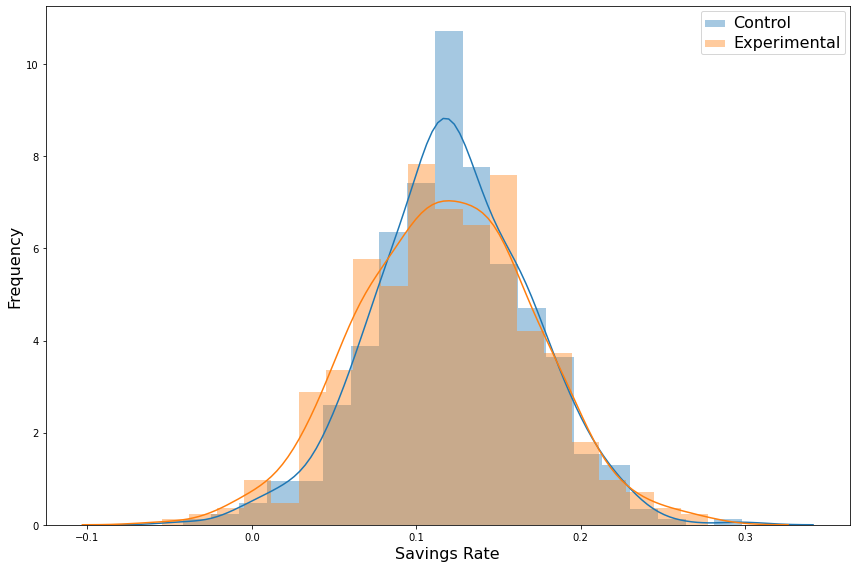

In [14]:
# Plot histogram of savings rates for 1 sample

fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(group_1, kde=True, bins=20, label='Control');
sns.distplot(group_2, kde=True, bins=20, label='Experimental');

ax.set_xlabel("Savings Rate",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend()
plt.setp(ax.get_legend().get_texts(), fontsize=16)
plt.tight_layout()

plt.savefig(fname='hist_1', dpi=150)
plt.show()

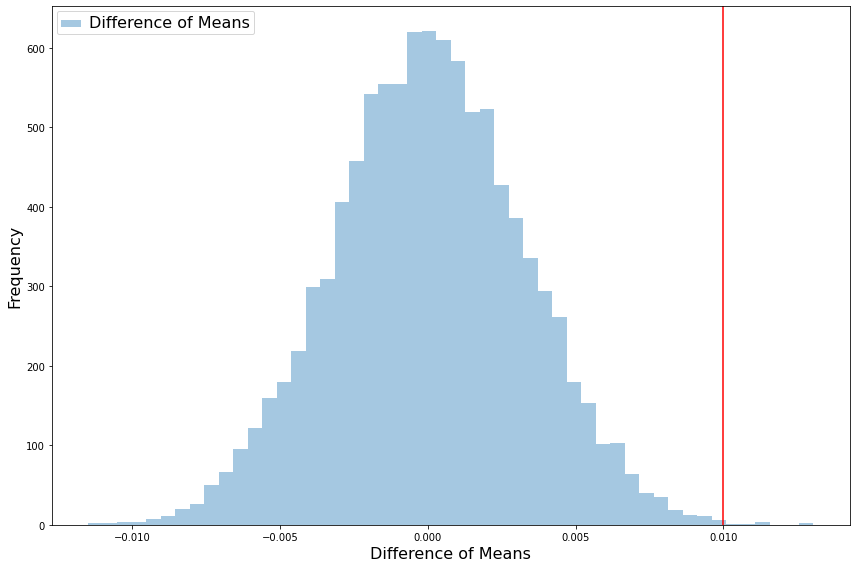

In [22]:
# Plot histogram of results for all 10,000 experiments

fig, ax = plt.subplots(figsize=(12,8))
#the input is mean_diff
sns.distplot(mean_diff, kde=False, bins=50, label='Difference of Means');

ax.set_xlabel("Difference of Means",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(x=0.01, c='red')
#The red vertical line shows the mean savings rate difference we actually observed (1%) when our client ran her experiment. 
plt.legend()
plt.setp(ax.get_legend().get_texts(), fontsize=16)
plt.tight_layout()

plt.savefig(fname='hist_2', dpi=150)
plt.show()

The percentage of observations to the right of the red line in the histogram below is the value we are after — the probability of observing as large an increase in savings as 1% from random chance (we do a one tailed test here because it is easier to understand and visualize).

In this case that value is very low — in only 7 out of the 10,000 experiments we ran (assuming the new design has zero effect on savings), did we observe a difference in group means of 1% or greater.

This means that there is only a 0.07% (very small) chance of observing a value as high as we did due to random chance! 


##  p value = The probability of observing what we observed if the null hypothesis were true. the lower the p-value, the less likely it is that we just got lucky with our experiment.

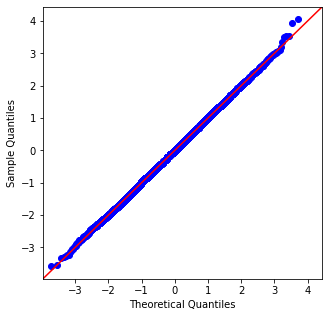

In [23]:
# Q-Q plot to check for normal distribution

fig_qq, ax_qq = plt.subplots(figsize=(5,5))
sm.qqplot(np.array(mean_diff), fit=True, line='45', ax=ax_qq);
plt.savefig(fname='qq_plot', dpi=150)

In [24]:
print('Percentage of obs. >= experimental result: ' + str(sum([1 for i in mean_diff if i >= 0.01])/sims))

Percentage of obs. >= experimental result: 0.0007


In [25]:
print('Stdev of mean diff from experiment: ' + str(round(np.var(mean_diff)**0.5, 5)))

Stdev of mean diff from experiment: 0.00321


In [26]:
print('Stdev of mean diff analytical: ' + str(round((np.var(group_1)/len(group_1) + np.var(group_2)/len(group_2))**0.5, 5)))

Stdev of mean diff analytical: 0.00318


In [27]:
print('Standard Error: ' + str((2*0.0025/500)**0.5))

Standard Error: 0.0031622776601683794


In [28]:
from scipy.stats import norm

# Two Tailed Test
print('The p-value is: ' + str(round((1 - norm.cdf(3.16))*2,4)))

The p-value is: 0.0016
